# Baseball Case Study Project

In [2]:
#Importing all the requreid libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')


# Examining The Data

In [3]:
# Reading the csv file
df = pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


* This method display the information about the dataframe including the index type and colunm type,non-null values and memory of usage.

In [5]:
# NULL values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

* There are no NAN-NULL values

In [6]:
# dataset type
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

* There are one float value rest are the intiger

In [7]:
#Dataset shape
df.shape

(30, 17)

* There are 30 rows and 17 columns in dataset.

In [8]:
#dataset columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Dataset contains 17 colunms

# Summary Statistics

In [9]:
#Describing dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1. There are no missing values.
2. The mean is more than 50% in median in all the    columns.
3. There is a large difference in 75% and max.
4. There are extreme outliers present in three        columns by seeing first and second analysis.

In [10]:
df.ERA.unique()

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

* Target/Dependent variable is discrete and categorical in nature

In [11]:
df.ERA.value_counts() 

3.62    1
4.31    1
3.57    1
3.74    1
3.94    1
4.02    1
5.04    1
3.67    1
4.24    1
4.69    1
4.41    1
4.16    1
3.43    1
4.14    1
4.03    1
3.21    1
4.28    1
3.36    1
4.04    1
3.80    1
3.72    1
3.44    1
4.07    1
4.64    1
2.94    1
3.73    1
4.09    1
4.33    1
4.05    1
3.98    1
Name: ERA, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='W', ylabel='count'>

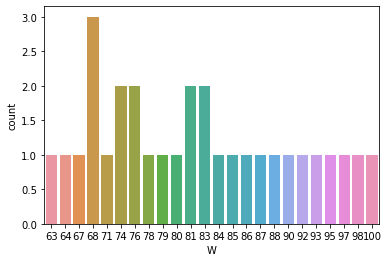

In [11]:
sns.countplot(df['W'])

* Data is not distributed normally in these columns

<AxesSubplot:xlabel='R', ylabel='count'>

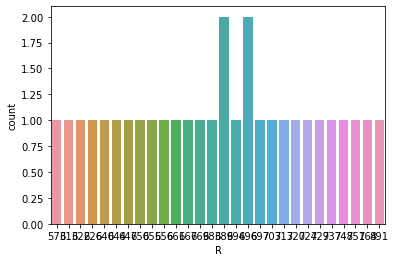

In [12]:
sns.countplot(df['R'])

* Data is not distributed normally in these columns

<AxesSubplot:xlabel='AB', ylabel='count'>

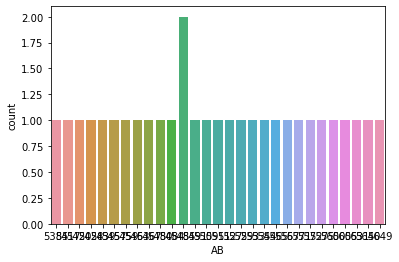

In [13]:
sns.countplot(df['AB'])

* Data is not distributed normally in these columns

<AxesSubplot:xlabel='H', ylabel='count'>

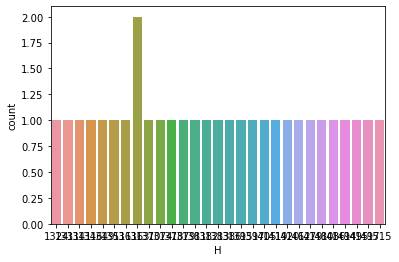

In [14]:
sns.countplot(df['H'])

* Data is not distributed normally in these columns

<AxesSubplot:xlabel='2B', ylabel='count'>

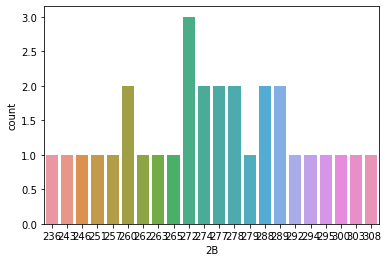

In [15]:
sns.countplot(df['2B'])

* Data is not distributed normally in these columns

<AxesSubplot:xlabel='3B', ylabel='count'>

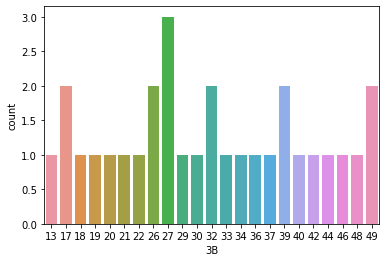

In [16]:
sns.countplot(df['3B'])

* Data is not distributed normally in these columns

<AxesSubplot:xlabel='HR', ylabel='count'>

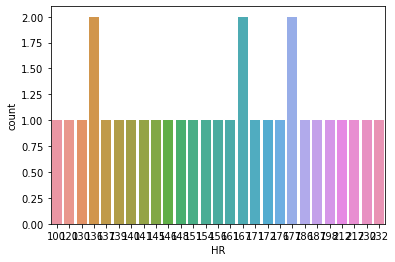

In [17]:
sns.countplot(df['HR'])

* Data is not distributed normally in the columns

<AxesSubplot:xlabel='BB', ylabel='count'>

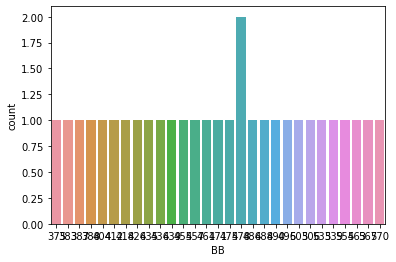

In [18]:
sns.countplot(df['BB'])

* Data is not distributed normally in the columns

<AxesSubplot:xlabel='ERA', ylabel='count'>

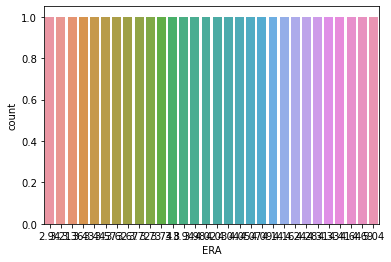

In [19]:
sns.countplot(df['ERA'])

* Data is not distributed normally in the columns

<AxesSubplot:>

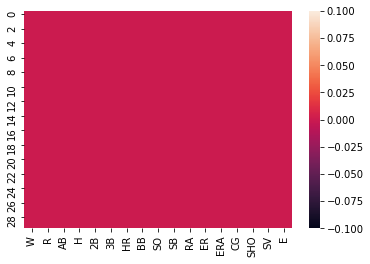

In [20]:
sns.heatmap(df.isnull()) 

* Heatmap contains all the NULL values of the dataset.

# Correlation

In [12]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

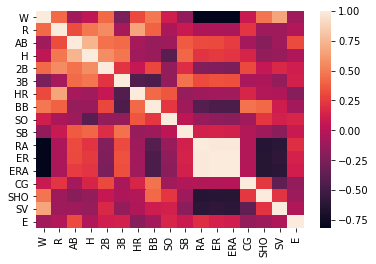

In [22]:
sns.heatmap(dfcor)

* Heatmap containes the difference of corresponding values of dataset.
* Light shades are highly correlated

<AxesSubplot:>

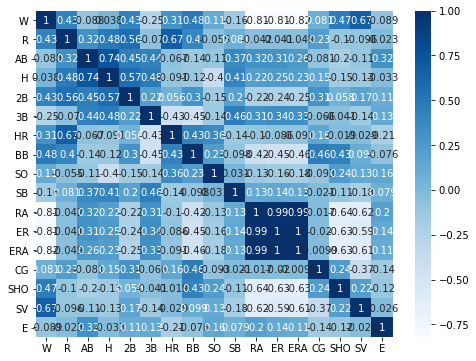

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

* Dark shades are higly correlated

<AxesSubplot:>

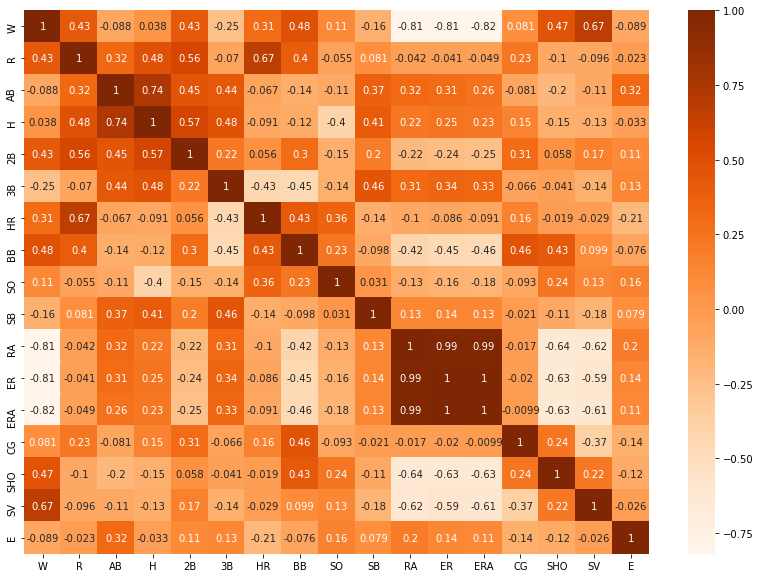

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

1. light shades are higly correlated
2. E is higly correlated with SV
3. ERA is higly positively correlated with SO
4. SO is higly positively correlated with 3B
5. 3B is higly positively correlated with 2B
6. AB is negatively correlated with E

# Plotting Outliers

In [13]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

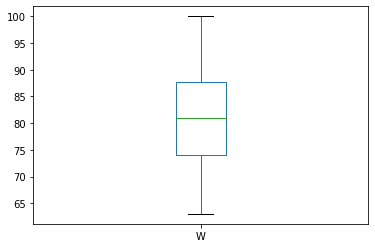

In [26]:
df['W'].plot.box()

* Here "W" have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

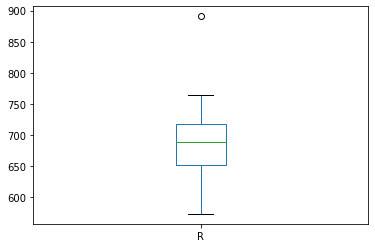

In [27]:
df['R'].plot.box()

* Here "R" have outside the viscous so we can find outliers easily.

<AxesSubplot:>

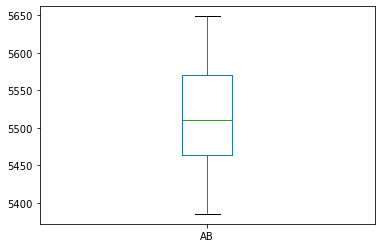

In [28]:
df['AB'].plot.box()

* Here "AB" have no outside the viscous so we cant find here outliers easily.


<AxesSubplot:>

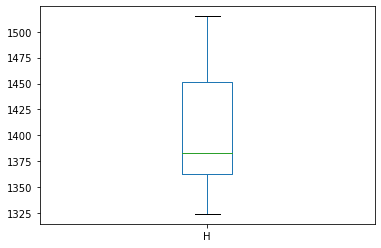

In [29]:
df['H'].plot.box()

* Here "H" have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

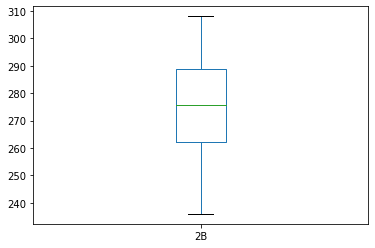

In [30]:
df['2B'].plot.box()

* Here 2B have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

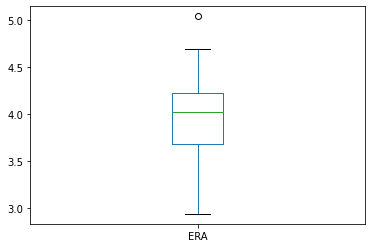

In [31]:
df['ERA'].plot.box()

* Here "ERA" have outside the viscous so we can find here outliers easily.


<AxesSubplot:>

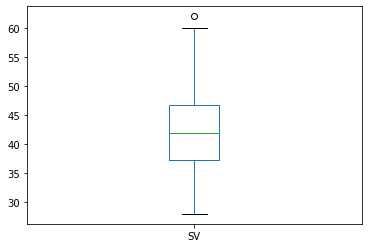

In [32]:
df['SV'].plot.box()

* Here "SV" have outside the viscous so we can find here outliers easily.

In [14]:
df.shape

(30, 17)

* Dataset contains 30 rows and 17 columnns

In [15]:
collist=df.columns.values
ncol=17
nrows=10

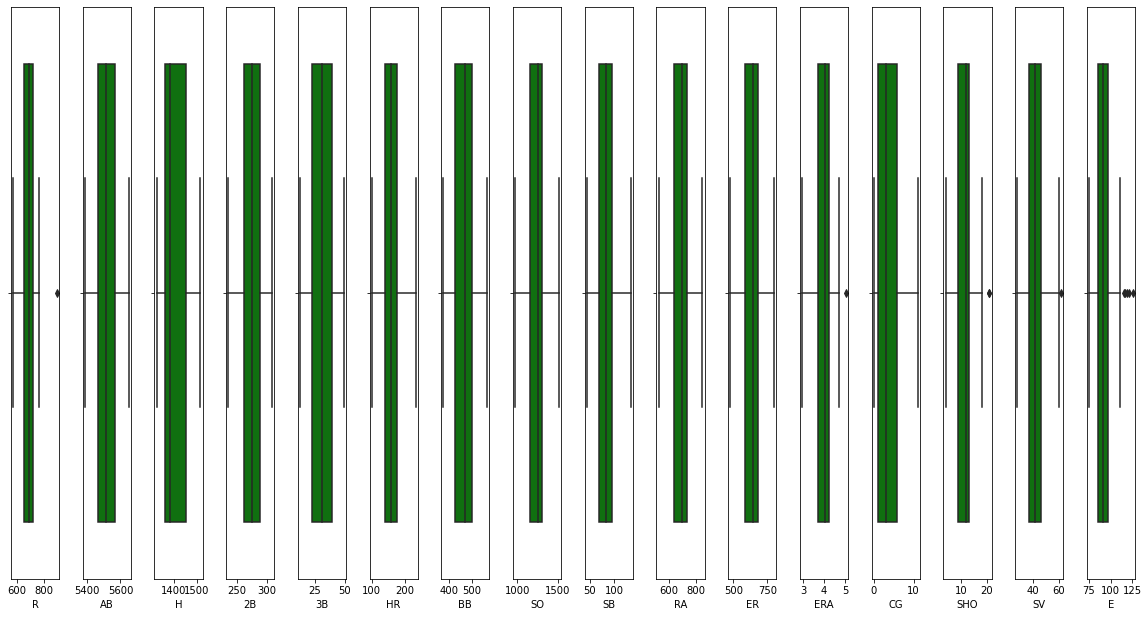

In [35]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

* Here we can find the collist of the all qualities and outliers.

# Checking  Skewness

<AxesSubplot:xlabel='W', ylabel='Density'>

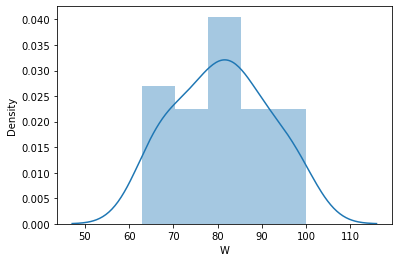

In [36]:
sns.distplot(df['W'])

* Data is not distributed normaly in this coulumns.

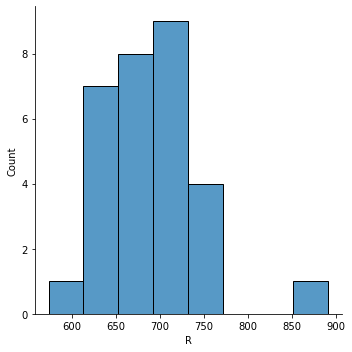

In [37]:
sns.displot(df['R'])

* Data is not distributed normaly in this columns.

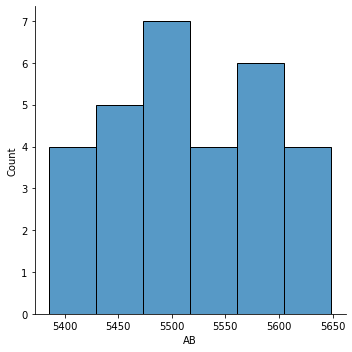

In [38]:
sns.displot(df['AB'])

* Data is not distributed normaly in this columns.

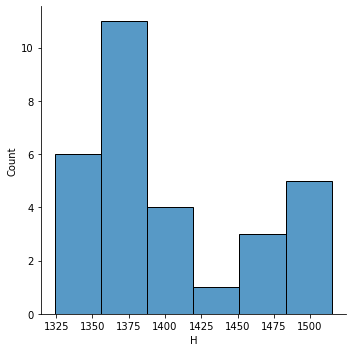

In [39]:
sns.displot(df['H'])

* Data is not distributed normaly in this columns.

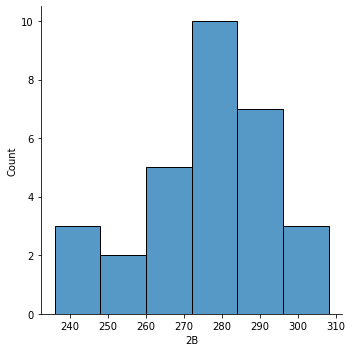

In [40]:
sns.displot(df['2B'])

* Data is not distributed normaly in this columns.

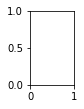

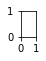

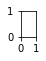

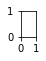

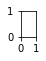

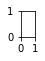

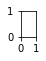

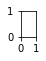

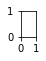

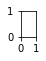

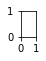

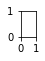

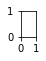

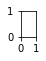

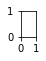

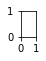

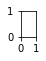

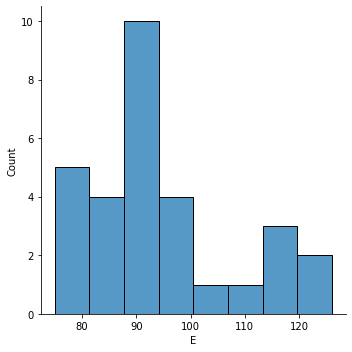

In [41]:
# Ploting tight layouts
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.displot(df[collist[i]])
    plt.tight_layout()

* Other independent variables are right skewed/positively skewed

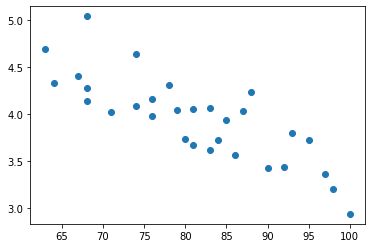

In [42]:
plt.scatter(df['W'],df['ERA'])

* Here scatter the value of W and ERA

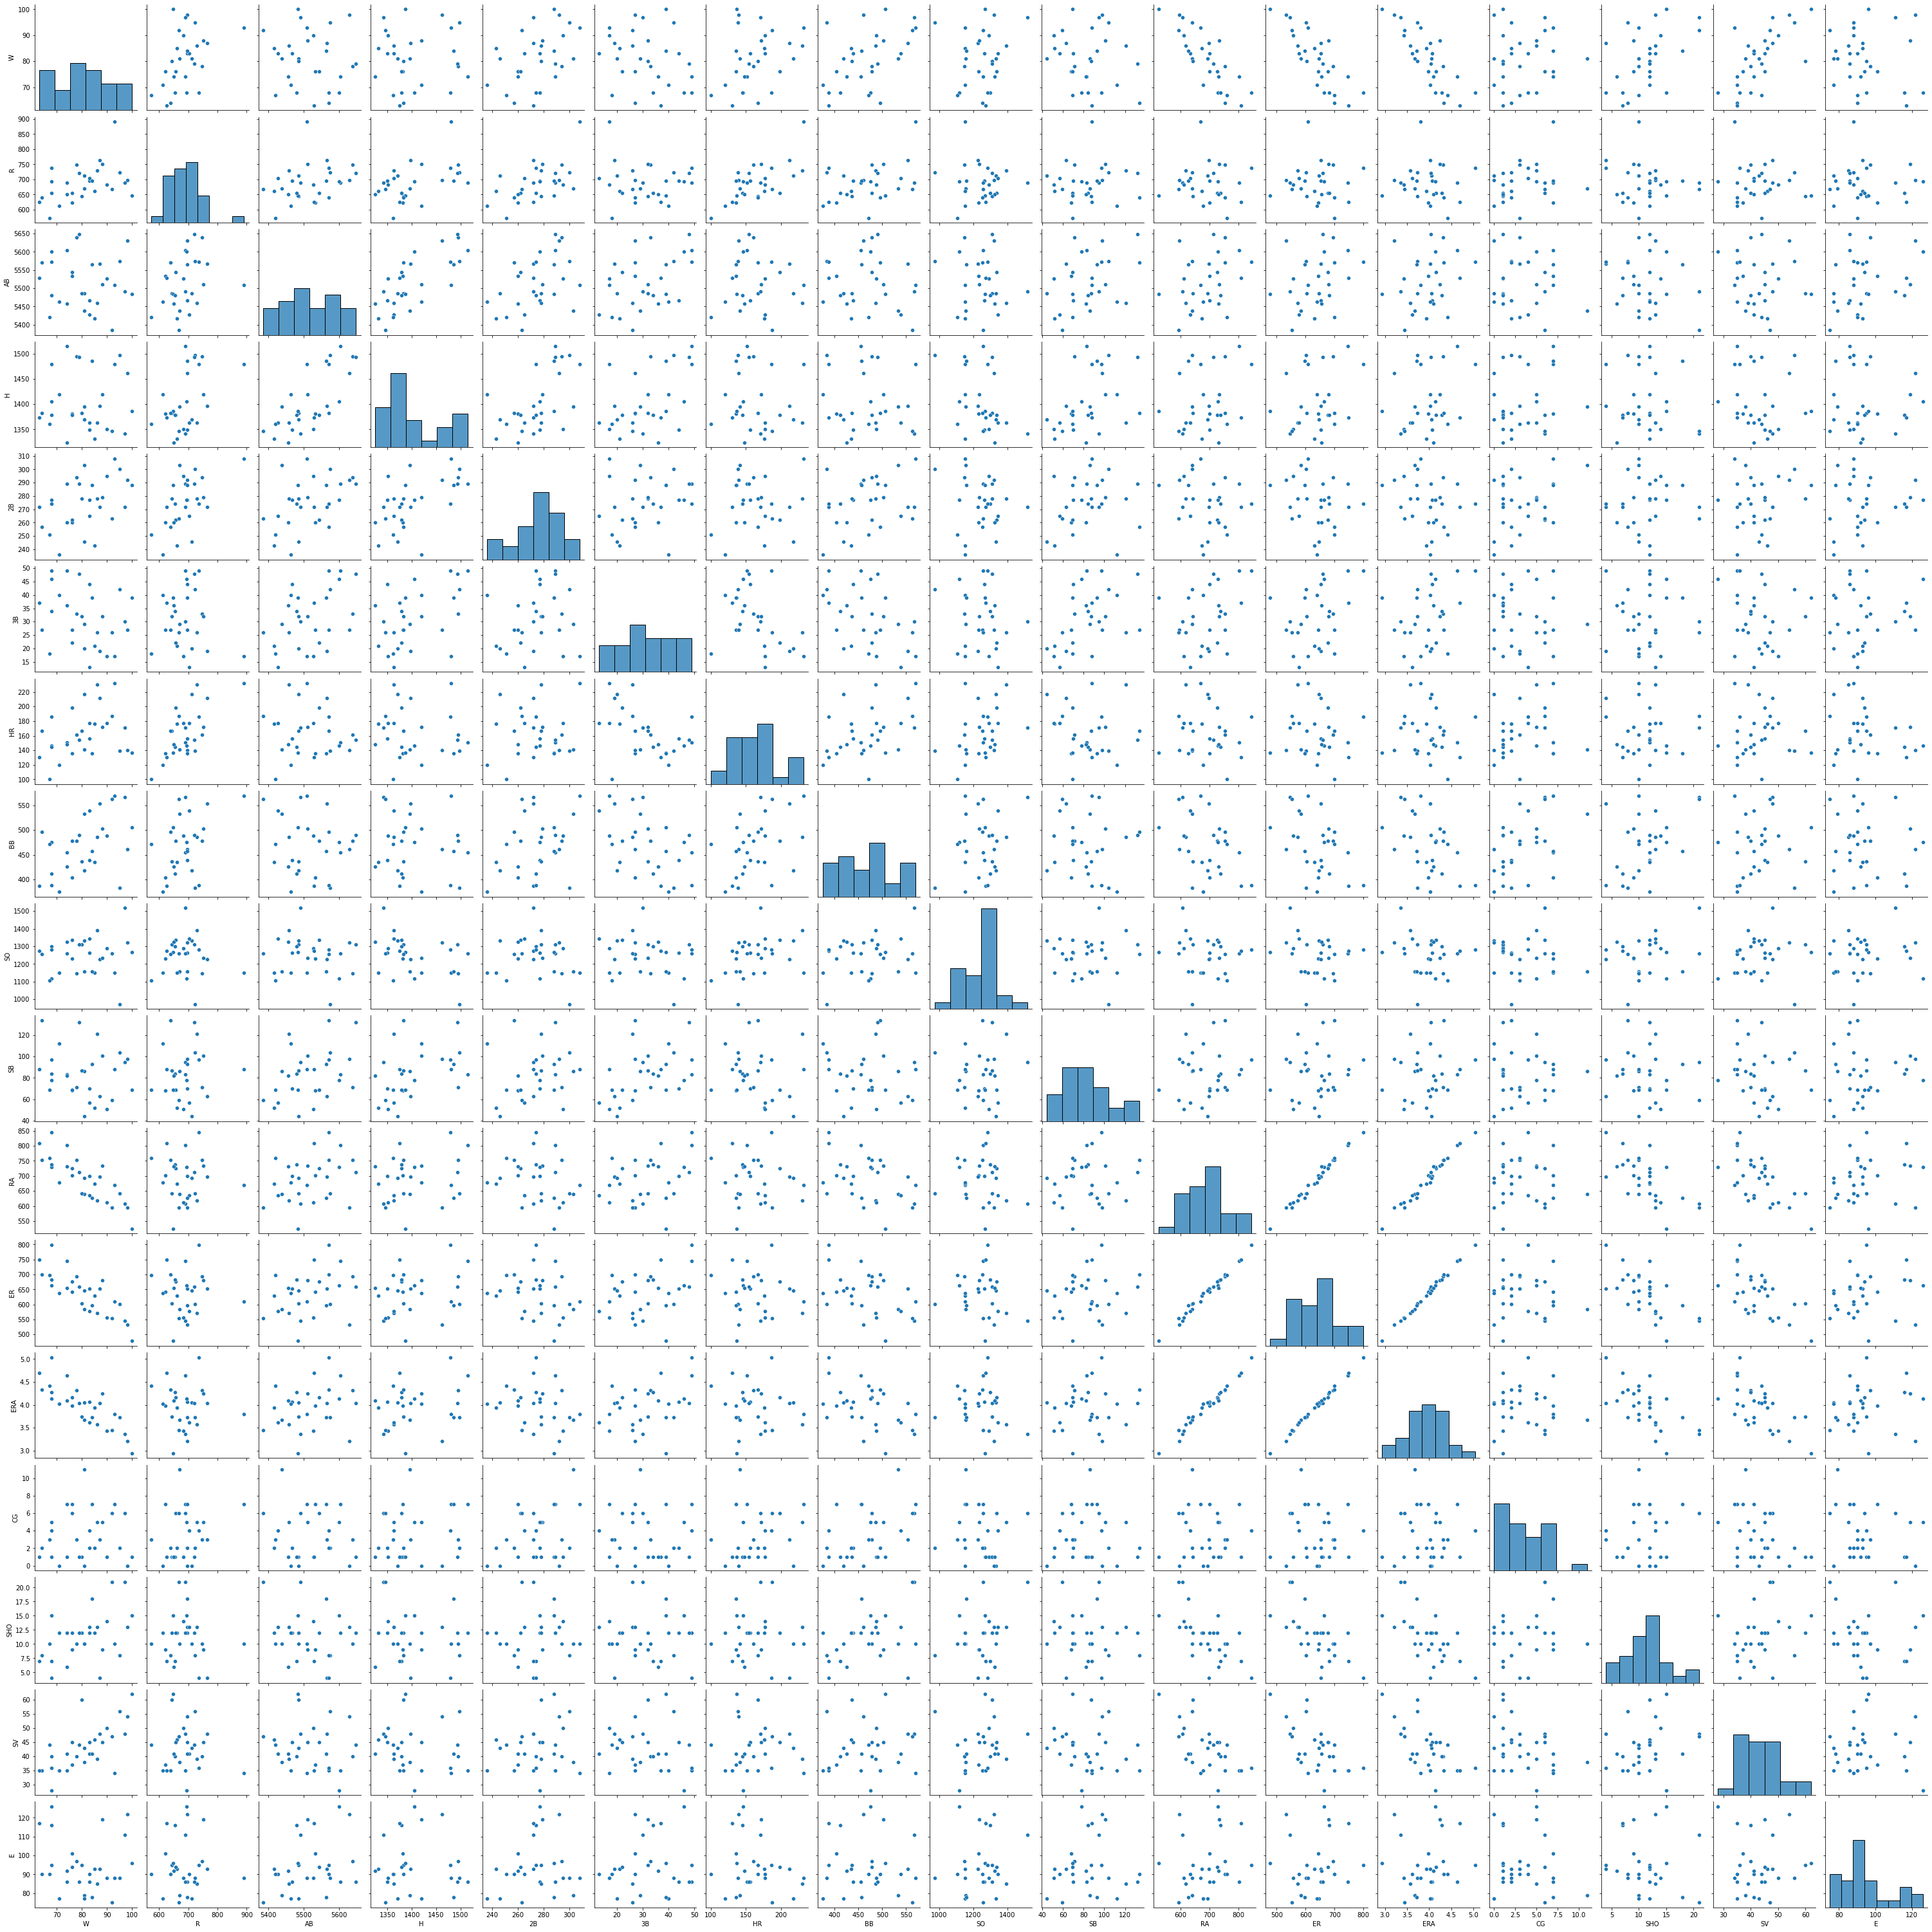

In [43]:
sns.pairplot(df) 

* Remove the missing values.

* Drop the nahativity correlated columns.

* Remove the outliers.

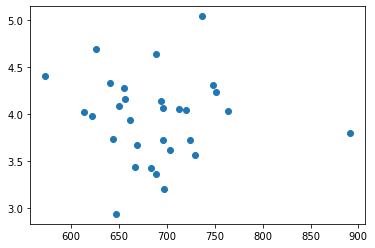

In [44]:
plt.scatter(df['R'],df['ERA'])
plt.show()

* Here scattering plot of R and ERA

* Droping "R" due to less effective to dataset

In [16]:
df.drop('R',axis=1, inplace=True)

In [17]:
df.head()

,W,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [18]:
df.shape

(30, 16)

* Now Dataset contains 30 rows and 16 columns.

# Encoding method

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['ERA']=LE.fit_transform(df['ERA'])

In [20]:
df["ERA"].unique()

array([ 9, 18,  7, 13, 27, 11, 15, 17, 10, 24, 22,  5, 12, 21, 20,  0,  1,
        2, 23, 25,  3,  6, 14, 26, 28,  4,  8, 16, 19, 29])

In [21]:
df.head()

,W,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86


In [51]:
df.columns

Index(['W', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Removing outliers

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.3654086 , 0.84773126, 1.66368512, 1.42017307, 1.04119304,
        0.7872986 , 1.53490242, 2.69762957, 0.91388329, 0.66623393,
        0.50511008, 0.63543842, 0.5398062 , 0.81462859, 1.67160651,
        0.46146963],
       [0.1978383 , 0.71109353, 0.97068076, 0.12740339, 1.23580856,
        0.24396668, 0.5365919 , 0.15487844, 0.60182558, 0.16597077,
        0.24892985, 0.4043699 , 0.5398062 , 0.1728    , 0.24987932,
        0.60719689],
       [0.00324325, 1.1152333 , 0.15189137, 1.58879521, 0.22380785,
        0.7233772 , 1.13914361, 0.89398189, 0.11144918, 0.68033909,
        0.75162313, 0.86650693, 2.77264091, 0.32091429, 0.65485616,
        1.11724227],
       [0.48324437, 0.24152162, 0.40108814, 0.82812203, 0.41842337,
        0.8831807 , 1.16053598, 0.16860185, 0.69098493, 0.18007593,
        0.10392217, 0.17330139, 1.3004422 , 0.56777144, 0.78410408,
        0.48575751],
       [0.67783942, 1.28073815, 1.98408098, 0.80189192, 1.72234737,
        0.40377019, 0.25136033, 

* Removed the ouliers of Dataset.

In [27]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


Thershold is 3 and where z>3

In [28]:
df_new=df[(z<3).all(axis=1)]

In [29]:
df_new

,W,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86
5,93,5509,1480,308,17,232,570,1151,88,670,609,11,7,10,34,88
6,87,5567,1397,272,19,212,554,1227,63,698,652,15,3,4,48,93
7,81,5485,1370,246,20,217,418,1331,44,693,646,17,0,10,43,77
8,80,5485,1383,278,32,167,436,1310,87,642,604,10,1,12,60,95
9,78,5640,1495,294,33,161,478,1148,71,753,694,24,3,10,40,97


In [30]:
df.shape

(30, 16)

* Dataset cointains 30 rows and 16 columns.

In [31]:
df_new.shape

(30, 16)

* Dataset cointains 30 rows and 16 columns.

# Standerd Scaler Method

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(df)

In [33]:
scaledX

array([[ 1.3654086 ,  0.84773126,  1.66368512,  1.42017307,  1.04119304,
        -0.7872986 , -1.53490242, -2.69762957,  0.91388329, -0.66623393,
        -0.50511008, -0.63543842, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.1978383 , -0.71109353, -0.97068076,  0.12740339,  1.23580856,
        -0.24396668, -0.5365919 ,  0.15487844, -0.60182558,  0.16597077,
         0.24892985,  0.4043699 , -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [ 0.00324325, -1.1152333 , -0.15189137,  1.58879521, -0.22380785,
        -0.7233772 ,  1.13914361, -0.89398189,  0.11144918, -0.68033909,
        -0.75162313, -0.86650693,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-0.48324437,  0.24152162, -0.40108814, -0.82812203, -0.41842337,
        -0.8831807 , -1.16053598, -0.16860185, -0.69098493,  0.18007593,
         0.10392217, -0.17330139,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [-0.67783942,  1.28073815,  1

In [34]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [35]:
Y.explained_variance_ratio_

array([3.35866653e-01, 1.71593290e-01, 1.18084459e-01, 8.66155656e-02,
       7.47912370e-02, 6.13344179e-02, 3.90198449e-02, 3.01591480e-02,
       2.44360610e-02, 1.87222235e-02, 1.60542590e-02, 9.32179933e-03,
       8.42757958e-03, 4.03760244e-03, 1.37271889e-03, 1.63140790e-04])

In [36]:
var_cumu= np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 33.58666529,  50.74599428,  62.55444021,  71.21599678,
        78.69512047,  84.82856226,  88.73054675,  91.74646155,
        94.19006764,  96.06228999,  97.6677159 ,  98.59989583,
        99.44265379,  99.84641403,  99.98368592, 100.        ])

In [37]:
k = np.argmax(var_cumu>99)
print('Number of componets explaining 99% variance:',k)

Number of componets explaining 99% variance: 12


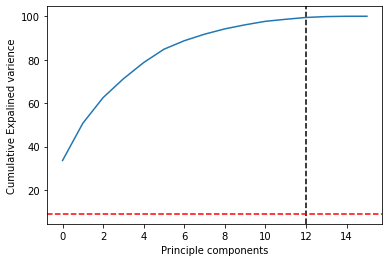

In [74]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

# Checking skewness

In [38]:
df.skew()

W      0.047089
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.000000
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

* For skewness am going to use log transformation.

### Data Transformation

In [41]:
# applying log Treansformation
df['H']=np.log(1+df['H'])
df['CG']=np.log(1+df['CG'])
df['SV']=np.log(1+df['SV'])
df['E']=np.log(1+df['E'])

# Regressor Methods

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
x= df.drop(['ERA'], axis=1)
y= df['ERA']
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=0, test_size=0.2)


In [44]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print(rmse) 

3.082207001484488
2.6645825188948455
5.422176684690384
2.8809720581775866
4.09878030638384
2.3021728866442674
3.03315017762062
3.7682887362833544
3.7013511046643495
5.495452665613635
3.6742346141747673
3.286335345030997
3.22490309931942
3.63318042491699
2.0976176963403033
3.0
2.7748873851023217
2.7748873851023217
1.9235384061671346
2.7202941017470885
5.215361924162119
3.271085446759225
3.478505426185217
1.7888543819998317
2.3021728866442674
2.8809720581775866
4.230839160261236
2.5495097567963922
2.16794833886788
3.082207001484488
2.949576240750525
2.6645825188948455
2.8809720581775866
3.8858718455450894
2.4899799195977463
4.266145801540309
3.146426544510455
6.410928169929843
2.9832867780352594
4.47213595499958
2.8635642126552705
3.687817782917155
3.5637059362410923
4.123105625617661
2.7202941017470885
2.8809720581775866
3.1937438845342623
3.478505426185217
3.987480407475377
4.774934554525329
2.5495097567963922
4.277849927241488
3.1144823004794873
3.7682887362833544
3.361547262794322
2.

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
y_pred=regressor.predict(x_test)

In [47]:
y_pred

array([ 4., 15., 22., 26.,  3., 23., 27.,  9.,  3., 15.])

In [48]:
dt_accuracy= round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

* The test accuracy of DecisionTreeRegressor is 100

In [49]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
y_pred= regressor.predict(x_test)
y_pred

array([ 5.2 , 12.08, 17.81, 24.85,  5.55, 20.84, 25.67,  8.48,  6.3 ,
       15.6 ])

In [51]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

99.12

* The test accuracy of RandomForestRegressor is 99.03

In [91]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred=regressor.predict(x_test)
y_pred

array([ 5.2 , 12.08, 17.81, 24.85,  5.55, 20.84, 25.67,  8.48,  6.3 ,
       15.6 ])

In [53]:
lr_accuracy=round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

99.12

* The test accuracy of LogisticRegression is 97.87

In [54]:
from sklearn.naive_bayes import GaussianNB
regressor=GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [55]:
y_pred=regressor.predict(x_test)
y_pred

array([ 5, 14, 21, 27,  3, 22, 22, 13,  3, 23])

In [56]:
nb_accuracy=round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

100.0

* The test accuracy of NB is 100

In [57]:
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(x_train,y_train)

SVR()

In [58]:
y_pred=regressor.predict(x_test)
y_pred

array([14.49297908, 14.49473291, 14.50954892, 14.51054466, 14.47471387,
       14.5047021 , 14.51226194, 14.4918214 , 14.49086606, 14.50306113])

In [59]:
svm_accuracy=round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

-1.02

* The test accuracy of SVM is -1.02

In [60]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [61]:
y_pred=regressor.predict(x_test)
y_pred

array([ 9. , 16.4, 19.6, 21. ,  6. , 17.6, 21.6,  9.6, 10.4, 17.4])

In [62]:
knn_accuracy=round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

80.84

* The Knn accuracy is 83.41

# Cross value correlation

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7129458416749797


In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9034754062673581


In [112]:
from sklearn.svm import SVR
regressor= SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.16606933270942772


In [114]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7275049144503327


In [115]:
from sklearn.neighbors import KNeighborsRegressor
regrssor=KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())


0.7275049144503327


# Hyperparameter Tunning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
parameter={'max_depth':[1,3,5,7,9,11,12],
           'criterion':['mse','friedman_mse']}

In [119]:
GCV= GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)


In [120]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [121]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7}

# Evaluate The Model

In [122]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod= DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
print(regressor.score(x_test,y_test)*100) 

86.48313492063492


# Saving the Model

In [123]:
import joblib
joblib.dump(Final_mod,"Baseball_Case_Study.csv") 

['Baseball_Case_Study.csv']

Saved the best model as "Baseball_Case_Study.csv"

# Prediction Method

In [125]:
Final_mod= DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
preds= regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values) 

[ 4. 17. 14. 29.  4. 21. 26.  7.  5. 14.]
[ 2 12 16 24  0 20 25  8  1 18]


* The train and test data is balanced most classification methods hit the 86% accuracy with the dataset